In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json
import os

In [4]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

(60000, 28, 28)

In [5]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

TensorShape([60000, 28, 28, 1])

In [6]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [7]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [8]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1875/1875 [==============================] - 9s 3ms/step - loss: 0.2303 - accuracy: 0.9306 - val_loss: 0.0962 - val_accuracy: 0.9734
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0878 - accuracy: 0.9732 - val_loss: 0.0595 - val_accuracy: 0.9820
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0601 - accuracy: 0.9819 - val_loss: 0.0503 - val_accuracy: 0.9852
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0481 - accuracy: 0.9853 - val_loss: 0.0355 - val_accuracy: 0.9906
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0371 - accuracy: 0.9885 - val_loss: 0.0263 - val_accuracy: 0.9922


In [9]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0456 - accuracy: 0.9847


[0.04555758833885193, 0.9847000241279602]

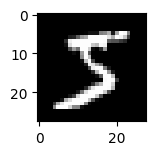

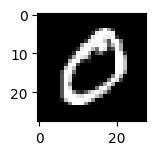

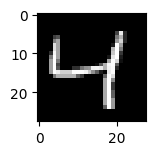

In [10]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [11]:
lenet_5_model.save('lenet_5_model')
print(os.listdir('lenet_5_model'))

INFO:tensorflow:Assets written to: lenet_5_model\assets


INFO:tensorflow:Assets written to: lenet_5_model\assets


['assets', 'keras_metadata.pb', 'saved_model.pb', 'variables']


In [12]:
lenet_5_model.save("my.h5")

In [13]:
lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [14]:
json_model = lenet_5_model.to_json()

In [15]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [16]:
lenet_5_model.save_weights('weights.ckpt')

In [17]:
# 从 checkpoint 文件加载模型权重
lenet_5_model.load_weights('weights.ckpt')

# 获取所有权重张量的名称
weights = lenet_5_model.weights
weight_names = [weight.name for weight in weights]

In [18]:
weights

[<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 6) dtype=float32, numpy=
 array([[[[-0.34106803,  0.21361455, -0.19214511, -0.18248402,
           -0.2068406 , -0.13348058]],
 
         [[-0.1616025 ,  0.3294949 , -0.54670906, -0.11305622,
           -0.15251663, -0.18840581]],
 
         [[-0.3517927 ,  0.14860275, -0.6073522 , -0.37506938,
           -0.29900217, -0.10690773]],
 
         [[-0.328942  ,  0.29658592, -0.26363355, -0.07388994,
           -0.19364461, -0.23510529]],
 
         [[-0.32862207,  0.4061173 ,  0.20131439, -0.02836337,
           -0.5027891 ,  0.01250314]]],
 
 
        [[[-0.39147696,  0.10522471, -0.21439181, -0.38978204,
            0.21289885, -0.09012283]],
 
         [[-0.16379537,  0.12817363, -0.63348573, -0.5414427 ,
            0.4206951 , -0.11187112]],
 
         [[-0.14083704,  0.16047513, -0.51316166, -0.29537237,
            0.12495682, -0.02014351]],
 
         [[ 0.14618957, -0.00943979, -0.03967495,  0.06753742,
           -0.15755579,  0.30

In [19]:
weight_names

['conv2d/kernel:0',
 'conv2d/bias:0',
 'conv2d_1/kernel:0',
 'conv2d_1/bias:0',
 'dense/kernel:0',
 'dense/bias:0',
 'dense_1/kernel:0',
 'dense_1/bias:0',
 'dense_2/kernel:0',
 'dense_2/bias:0']

In [23]:
str1 = ['conv2d_kernel:0',
'pool1',
 'conv2d_1_kernel:0',
'pool2',
 'flatten',   
 'dense_kernel:0',

 'dense_1_kernel:0',

 'dense_2_kernel:0',
]

In [24]:
# 使用 Python 的 open 函数创建一个 txt 文件
for i in range(len(lenet_5_model.layers)):
    filename = str1[i] + '.bin'
    
    with open(filename, 'w') as f:
   
        weight_value = lenet_5_model.layers[i].get_weights()

        # 将权重张量的名称和值写入文件

        f.write(str(weight_value) + '\n')

In [ ]:
len(lenet_5_model.layers)

In [22]:
lenet_5_model.layers

In [ ]:
lenet_5_model.layers[0].get_weights()